In [69]:
import joblib, os, sys
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [3]:
functions = ['linear','quadratic','sine']

In [124]:
2.4848 * (180 / np.pi)

142.36855293410696

linear
Scaled var 0.34704289879217 0.3290352482383889
Scaled std 0.5891034703616759 0.5736159414088742
Scaled Min/Max X -1.0 1.020408163265306
Scaled Min/Max y -1.0 1.0



/Users/grierjones/miniconda3/envs/simple_qml/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.3.0 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


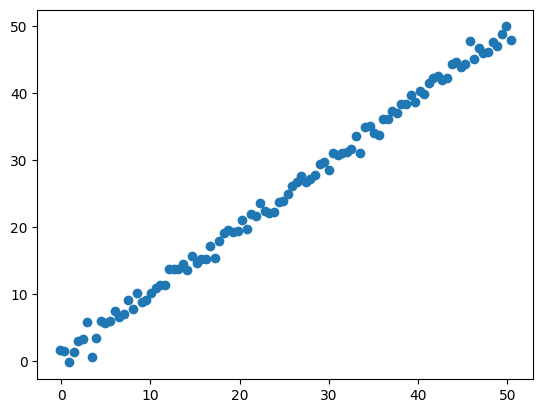

quadratic
Scaled var 0.35423530662131997 0.3402154319663351
Scaled std 0.595176702014889 0.583279891618368
Scaled Min/Max X -1.0412371134020617 1.0
Scaled Min/Max y -1.0 1.0175496119449714



/Users/grierjones/miniconda3/envs/simple_qml/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.3.0 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


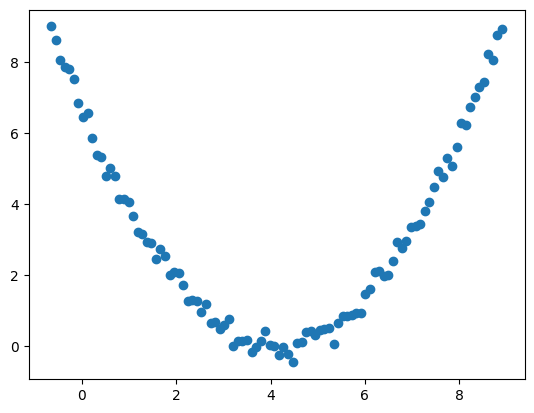

sine
Scaled var 0.3400673400673402 0.31659502923322114
Scaled std 0.5831529302570125 0.5626677787409025
Scaled Min/Max X -1.0 1.0
Scaled Min/Max y -1.0 0.9999999999999997



/Users/grierjones/miniconda3/envs/simple_qml/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.3.0 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


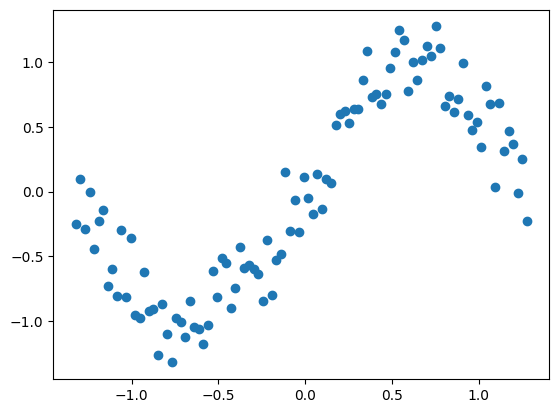

In [9]:
func_dict = {}
for f in functions:
    print(f)
    
    path = f'function-calc-test/{f}/{f}'
    train = joblib.load(f'{path}_train.bin')
    test = joblib.load(f'{path}_test.bin')
    validation = joblib.load(f'{path}_validate.bin')
    scaler = joblib.load(f'{path}_scaler.bin')
    
    X,y = np.vstack([train['X'],test['X'],validation['X']]),np.vstack([train['y'],test['y'],validation['y']])
    # plt.scatter(X,y)
    
    print("Scaled var",np.var(X),np.var(y))
    print("Scaled std",np.std(X),np.std(y))
    print("Scaled Min/Max X",np.min(X),np.max(X))
    print("Scaled Min/Max y",np.min(y),np.max(y))
    print()
    y = scaler.inverse_transform(y.reshape(-1, 1))
    X = scaler.inverse_transform(X.reshape(-1, 1))
    func_dict[f] = np.hstack([X,y])
    plt.scatter(X,y)
    # print("UnScaled var",np.var(X),np.var(y))
    # print("UnScaled std",np.std(X),np.std(y))
    # print("UnScaled Min/Max X",np.min(X),np.max(X))
    # print("UnScaled Min/Max y",np.min(y),np.max(y))    
    # print()
    # print()
    plt.show()

In [105]:
stats = {}
for k,v in func_dict.items():
    stats[k] ={
    'Var(X)':np.var(v[:,0]),
    'Var(Y)':np.var(v[:,1]),
    'Min(X)':np.min(v[:,0]),
    'Max(X)':np.max(v[:,0]),
    'Min(Y)':np.min(v[:,1]),
    'Max(Y)':np.max(v[:,1])}


In [108]:
pd.DataFrame(stats).to_excel('function-calc-test/stats_noise.xlsx')

[]

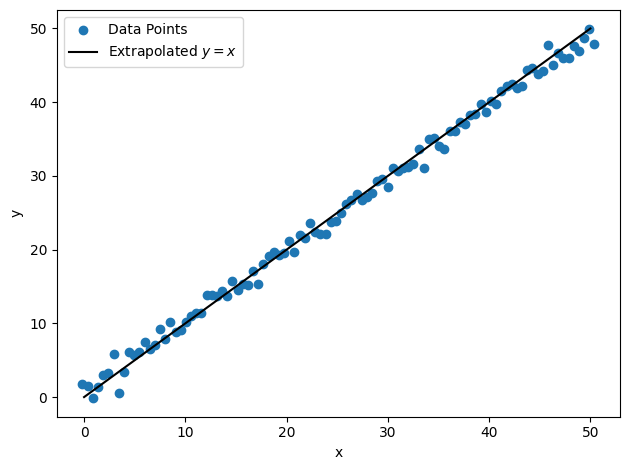

In [113]:
# Parameters for the noisy linear function
n_points = 100  # Number of points
x = np.linspace(0, 50, n_points)  # x values

plt.scatter(*func_dict['linear'].T,label='Data Points')
plt.plot(x,x,label=r'Extrapolated $y=x$',color='k')
plt.legend(loc=2)
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.savefig('images/Function_Fitting/extrapolated_linear.png',dpi=300,bbox_inches='tight')
plt.plot()

array([ 0.        ,  0.50505051,  1.01010101,  1.51515152,  2.02020202,
        2.52525253,  3.03030303,  3.53535354,  4.04040404,  4.54545455,
        5.05050505,  5.55555556,  6.06060606,  6.56565657,  7.07070707,
        7.57575758,  8.08080808,  8.58585859,  9.09090909,  9.5959596 ,
       10.1010101 , 10.60606061, 11.11111111, 11.61616162, 12.12121212,
       12.62626263, 13.13131313, 13.63636364, 14.14141414, 14.64646465,
       15.15151515, 15.65656566, 16.16161616, 16.66666667, 17.17171717,
       17.67676768, 18.18181818, 18.68686869, 19.19191919, 19.6969697 ,
       20.2020202 , 20.70707071, 21.21212121, 21.71717172, 22.22222222,
       22.72727273, 23.23232323, 23.73737374, 24.24242424, 24.74747475,
       25.25252525, 25.75757576, 26.26262626, 26.76767677, 27.27272727,
       27.77777778, 28.28282828, 28.78787879, 29.29292929, 29.7979798 ,
       30.3030303 , 30.80808081, 31.31313131, 31.81818182, 32.32323232,
       32.82828283, 33.33333333, 33.83838384, 34.34343434, 34.84

In [123]:
np.var((x.reshape(-1,1)-np.sort(func_dict['linear'],axis=0)))

0.15241899811213758

[]

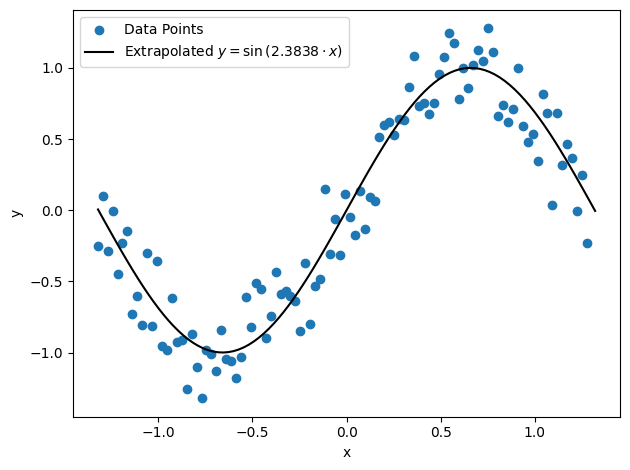

In [97]:
# Parameters for the noisy linear function
n_points = 100  # Number of points
x = np.linspace(-1.32, 1.32, n_points)  # x values

plt.scatter(*func_dict['sine'].T,label='Data Points')
plt.plot(x,np.sin(2.3838*x),label=r'Extrapolated $y=\sin{(2.3838 \cdot x)}$',color='k')
plt.legend(loc=2)
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
# plt.savefig('images/Function_Fitting/extrapolated_sine.png',dpi=300,bbox_inches='tight')
plt.plot()

In [49]:
2.3838 * (180 / np.pi)

136.58167920328563

In [54]:
-1.32 * (180 / np.pi),(1.32 * (180 / np.pi))

(-75.63042895726866, 75.63042895726866)

[]

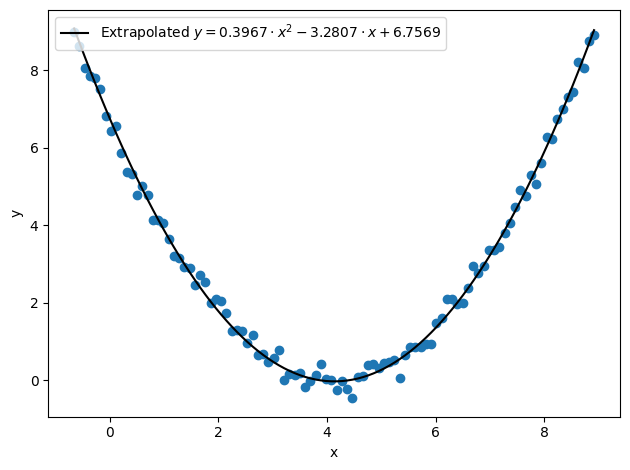

In [98]:
plt.scatter(*func_dict['quadratic'].T)
quad_x = np.linspace(np.min(func_dict['quadratic'][:,0]),np.max(func_dict['quadratic'][:,0]),100)
quad_y = [0.3967 * x**2 - 3.2807*x + 6.7569 for x in quad_x]
plt.plot(quad_x,quad_y,label=r'Extrapolated $y=0.3967 \cdot x^{2} - 3.2807 \cdot x + 6.7569$',color='k')
plt.legend(loc=2)
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.savefig('images/Function_Fitting/extrapolated_quadratic.png',dpi=300,bbox_inches='tight')
plt.plot()

In [ ]:

sigma_epsilon = 0.58  # Standard deviation of the noise

# Generate Gaussian noise
epsilon = np.random.normal(0, sigma_epsilon, n_points)

# Define the noisy linear function
f_x = x + epsilon
x,f_x = scaler.fit_transform(x.reshape(-1,1)),scaler.fit_transform(f_x.reshape(-1,1))

In [ ]:
from sklearn.linear_model import LinearRegression

f='linear'
path = f'function-calc-test/{f}/{f}'
train = joblib.load(f'{path}_train.bin')
test = joblib.load(f'{path}_test.bin')
validation = joblib.load(f'{path}_validate.bin')
scaler = joblib.load(f'{path}_scaler.bin')
X,y = np.vstack([train['X'],test['X'],validation['X']]),np.vstack([train['y'],test['y'],validation['y']])
# y = scaler.inverse_transform(y.reshape(-1, 1))
# X = scaler.inverse_transform(X.reshape(-1, 1))

# Given data
data = np.hstack([X,y])

# Separate x and y
x = data[:, 0].reshape(-1, 1)
y = data[:, 1]

# Fit linear regression model
model = LinearRegression()
model.fit(x, y)

# Retrieve slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

def linear_function(x,m,b):
    return m*x + b
    
# Plot data and the regression line
plt.scatter(x, y, label="Data points")
plt.plot(x, linear_function(x,slope,intercept), color="red", label="Best-fit line")
plt.plot(x, linear_function(x,1,0), color="red", label="Best-fit line")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Linear Fit")
plt.show()


In [ ]:
# plt.scatter(x,x)
plt.scatter(x,f_x,label='new')
plt.scatter(X,y,label='old')
plt.legend()
plt.show()

In [ ]:
np.std(f_x),np.std(y)

In [ ]:
np.var(f_x),np.var(y)

In [ ]:
x_data, y_data = func_dict['quadratic'].T
# Fit a quadratic function to the data
coefficients = np.polyfit(x_data, y_data, deg=2)  # Coefficients of the form [a, b, c]

a, b, c= coefficients


In [ ]:
plt.scatter(*func_dict['quadratic'].T)

In [ ]:
import numpy as np
from scipy.optimize import minimize

# Observed data (x_obs, y_obs)
x_obs = x_data
y_obs = y_data

# Define the model: quadratic function
def quadratic_model(x, a, b, c):
    return a * x**2 + b * x + c

# Define the error function for TLS
def tls_error(params, x_obs, y_obs):
    a, b, c = params
    x_adj = np.copy(x_obs)  # Adjusted x values
    # Iteratively refine x_adj by minimizing perpendicular distances
    for i in range(len(x_obs)):
        def point_distance(x_adj_i):
            return (y_obs[i] - quadratic_model(x_adj_i, a, b, c))**2 + (x_obs[i] - x_adj_i)**2
        res = minimize(point_distance, x_obs[i])
        x_adj[i] = res.x
    # Total perpendicular error
    return np.sum((y_obs - quadratic_model(x_adj, a, b, c))**2 + (x_obs - x_adj)**2)

# Initial guess for a, b, c
initial_params = [1, 1, 1]

# Optimize to find best a, b, c
result = minimize(tls_error, initial_params, args=(x_obs, y_obs))
a, b, c = result.x

print(f"Fitted coefficients: a = {a}, b = {b}, c = {c}")


a = np.array([(x,quadratic_model(x, a, b, c)) for x in x_data])
a = a[a[:,0].argsort()]
plt.plot(*a.T)
plt.scatter(x_data,y_data)

In [ ]:
from scipy.optimize import curve_fit


# Provided data
data = func_dict['sine'][func_dict['sine'][:,0].argsort()]
x_obs = data[:, 0]
y_obs = data[:, 1]



In [ ]:
# Define the sine model
def sine_model(x, a, b, c):
    return a * np.sin(b * x + c)

# Initial guess for parameters: amplitude, frequency, phase
initial_guess = [1, 2 * np.pi, 0]  # Amplitude 1, frequency ~1 cycle, phase 0

# Fit the sine model to the data
params, _ = curve_fit(
    sine_model,
    x_obs,
    y_obs
)

# Extract parameters
amplitude, frequency, phase = params

# Print the results
print(f"Amplitude (a): {amplitude:.4f}")
print(f"Frequency (b): {frequency:.4f}")
print(f"Phase (c): {phase:.4f}")

# Generate smooth sine wave for plotting
y_fitted = sine_model(x_obs, amplitude, frequency, phase)
# y_fitted = sine_model(x_obs, 1, frequency, 0)

# Parameters for the noisy linear function
n_points = 100  # Number of points
x = np.linspace(y_obs.min(),y_obs.max(), n_points)  # x values
# sigma_epsilon = 0.58  # Standard deviation of the noise
sigma_epsilon = np.std(y_obs)
# Generate Gaussian noise
epsilon = np.random.normal(0, sigma_epsilon, n_points)

# Plot the result
plt.figure(figsize=(10, 6))
plt.scatter(x_obs, y_fitted, label='Fitted Sine Function', color='blue')
plt.scatter(x_obs, y_obs, label='Observed Data', color='red', alpha=0.6)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sine Function Fit')
plt.show()

In [ ]:
from sympy import nsimplify, pi

# Convert to degrees
degrees = frequency  * 180 / np.pi

# Approximate the fraction
fraction_x = nsimplify(frequency  / np.pi)

degrees, fraction_x

In [ ]:
frequency 